In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
adv_stats = pd.read_csv('player-data-wrangled/player2017/Adv-2017wrangled.csv')
adv_stats.drop(adv_stats.columns[[0, 1, 20, 25, 3, 4, 5, 6, 7, 30]], axis = 1, inplace = True)
adv_stats.columns

Index(['Player', 'PER', 'TS.', 'X3PAr', 'FTr', 'ORB.', 'DRB.', 'TRB.', 'AST.',
       'STL.', 'BLK.', 'TOV.', 'USG.', 'OWS', 'DWS', 'WS', 'WS.48', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [29]:
perGame = pd.read_csv('player-data-wrangled/player2017/PerGame-2017wrangled.csv')
perGame.drop(perGame.columns[[0, 1, 20, 25]], axis = 1, inplace = True)
perGame.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG.',
       'X3P', 'X3PA', 'X3P.', 'X2P', 'X2PA', 'X2P.', 'eFG.', 'FT', 'FT.',
       'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF', 'PS.G', 'fix'],
      dtype='object')

In [30]:
perGameAdv = perGame.merge(adv_stats, on = 'Player', how = 'inner')
perGameAdv.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG.',
       'X3P', 'X3PA', 'X3P.', 'X2P', 'X2PA', 'X2P.', 'eFG.', 'FT', 'FT.',
       'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF', 'PS.G', 'fix', 'PER',
       'TS.', 'X3PAr', 'FTr', 'ORB.', 'DRB.', 'TRB.', 'AST.', 'STL.', 'BLK.',
       'TOV.', 'USG.', 'OWS', 'DWS', 'WS', 'WS.48', 'OBPM', 'DBPM', 'BPM',
       'VORP'],
      dtype='object')

In [31]:
fa = pd.read_csv('salary-data/fixed-fa-signings/fixed-2017.csv')
fa.drop(fa.columns[[0, 1, 2, 3, 4, 5, 6]], axis = 1, inplace = True)
fa.columns

Index(['total-contract', 'average', 'name'], dtype='object')

In [32]:
final = perGameAdv.merge(fa, left_on = 'fix', right_on = 'name', how = 'inner')
# drop 'fix' and 'name
final.drop(final.columns[[27]], axis = 1, inplace = True)
final.head()
final2 = final.copy(deep = True)

In [33]:
final.drop(final.columns[[0, 1, 3, 49]], axis = 1, inplace = True)

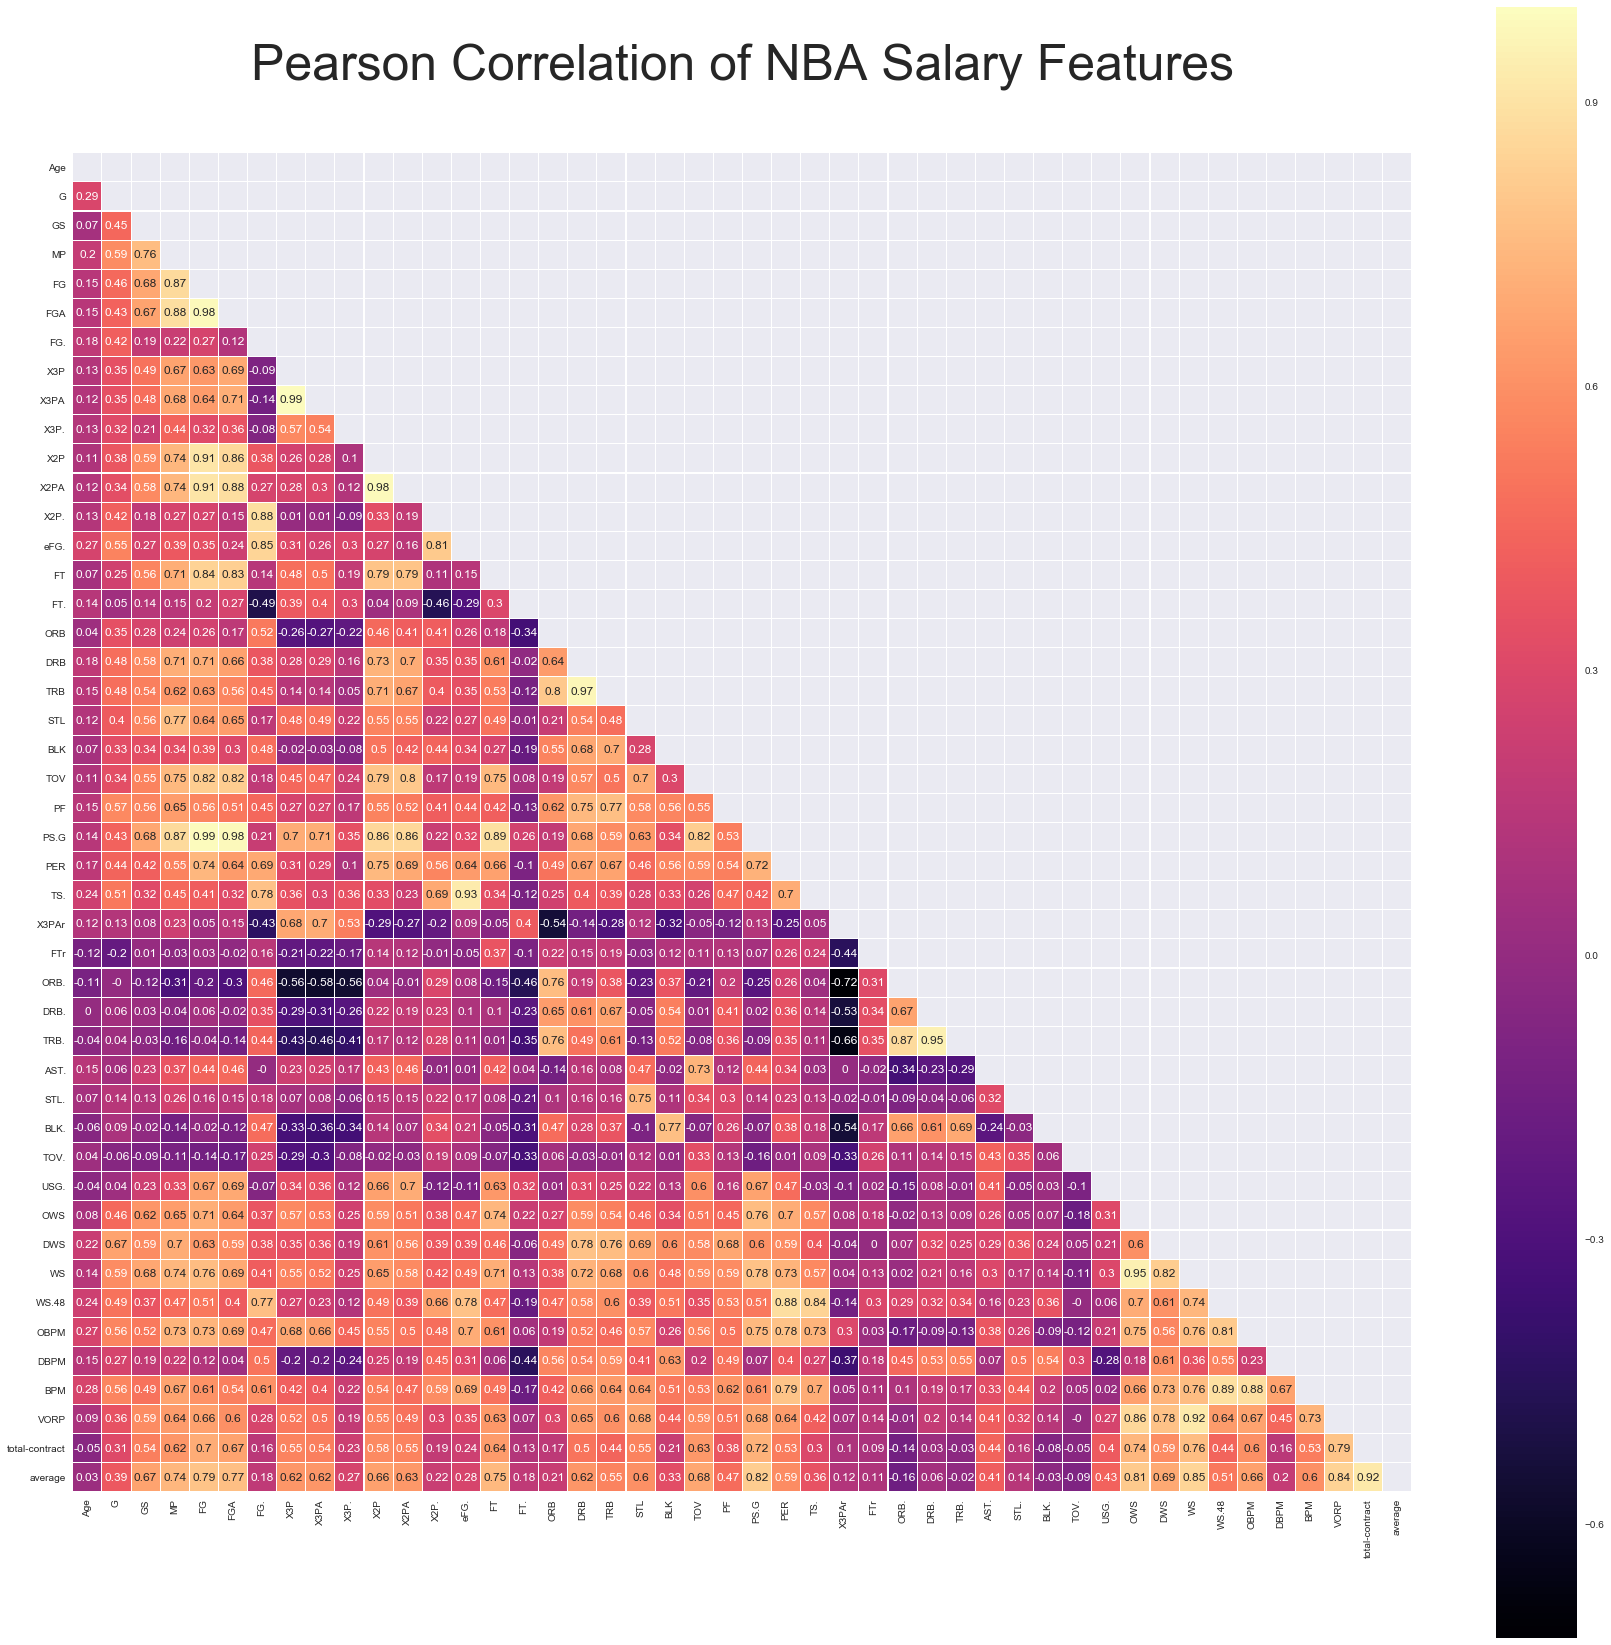

In [34]:
# Check correlation between features 
colormap = plt.cm.magma
sns.set(font_scale=1)
plt.figure(figsize=(30,30))

plt.title('Pearson Correlation of NBA Salary Features', y=1.05, size=50)

corr = final.astype(float).corr().round(2)
# corr = smalls.astype(float).corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)

# mask upper diagonal of heatmap
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,\
            mask = mask, linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [35]:
final2.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG.',
       'X3P', 'X3PA', 'X3P.', 'X2P', 'X2PA', 'X2P.', 'eFG.', 'FT', 'FT.',
       'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF', 'PS.G', 'PER', 'TS.',
       'X3PAr', 'FTr', 'ORB.', 'DRB.', 'TRB.', 'AST.', 'STL.', 'BLK.', 'TOV.',
       'USG.', 'OWS', 'DWS', 'WS', 'WS.48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'total-contract', 'average', 'name'],
      dtype='object')

In [36]:
#Selecting candidates
final2.drop(final2.columns[[0, 1, 2, 3, 4, 5, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21,
                         25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                         41, 42, 49]], axis = 1, inplace = True)
final2.columns

Index(['MP', 'FG', 'FGA', 'FT', 'DRB', 'STL', 'BLK', 'TOV', 'PS.G', 'PER',
       'DWS', 'OBPM', 'DBPM', 'BPM', 'VORP', 'total-contract', 'average'],
      dtype='object')

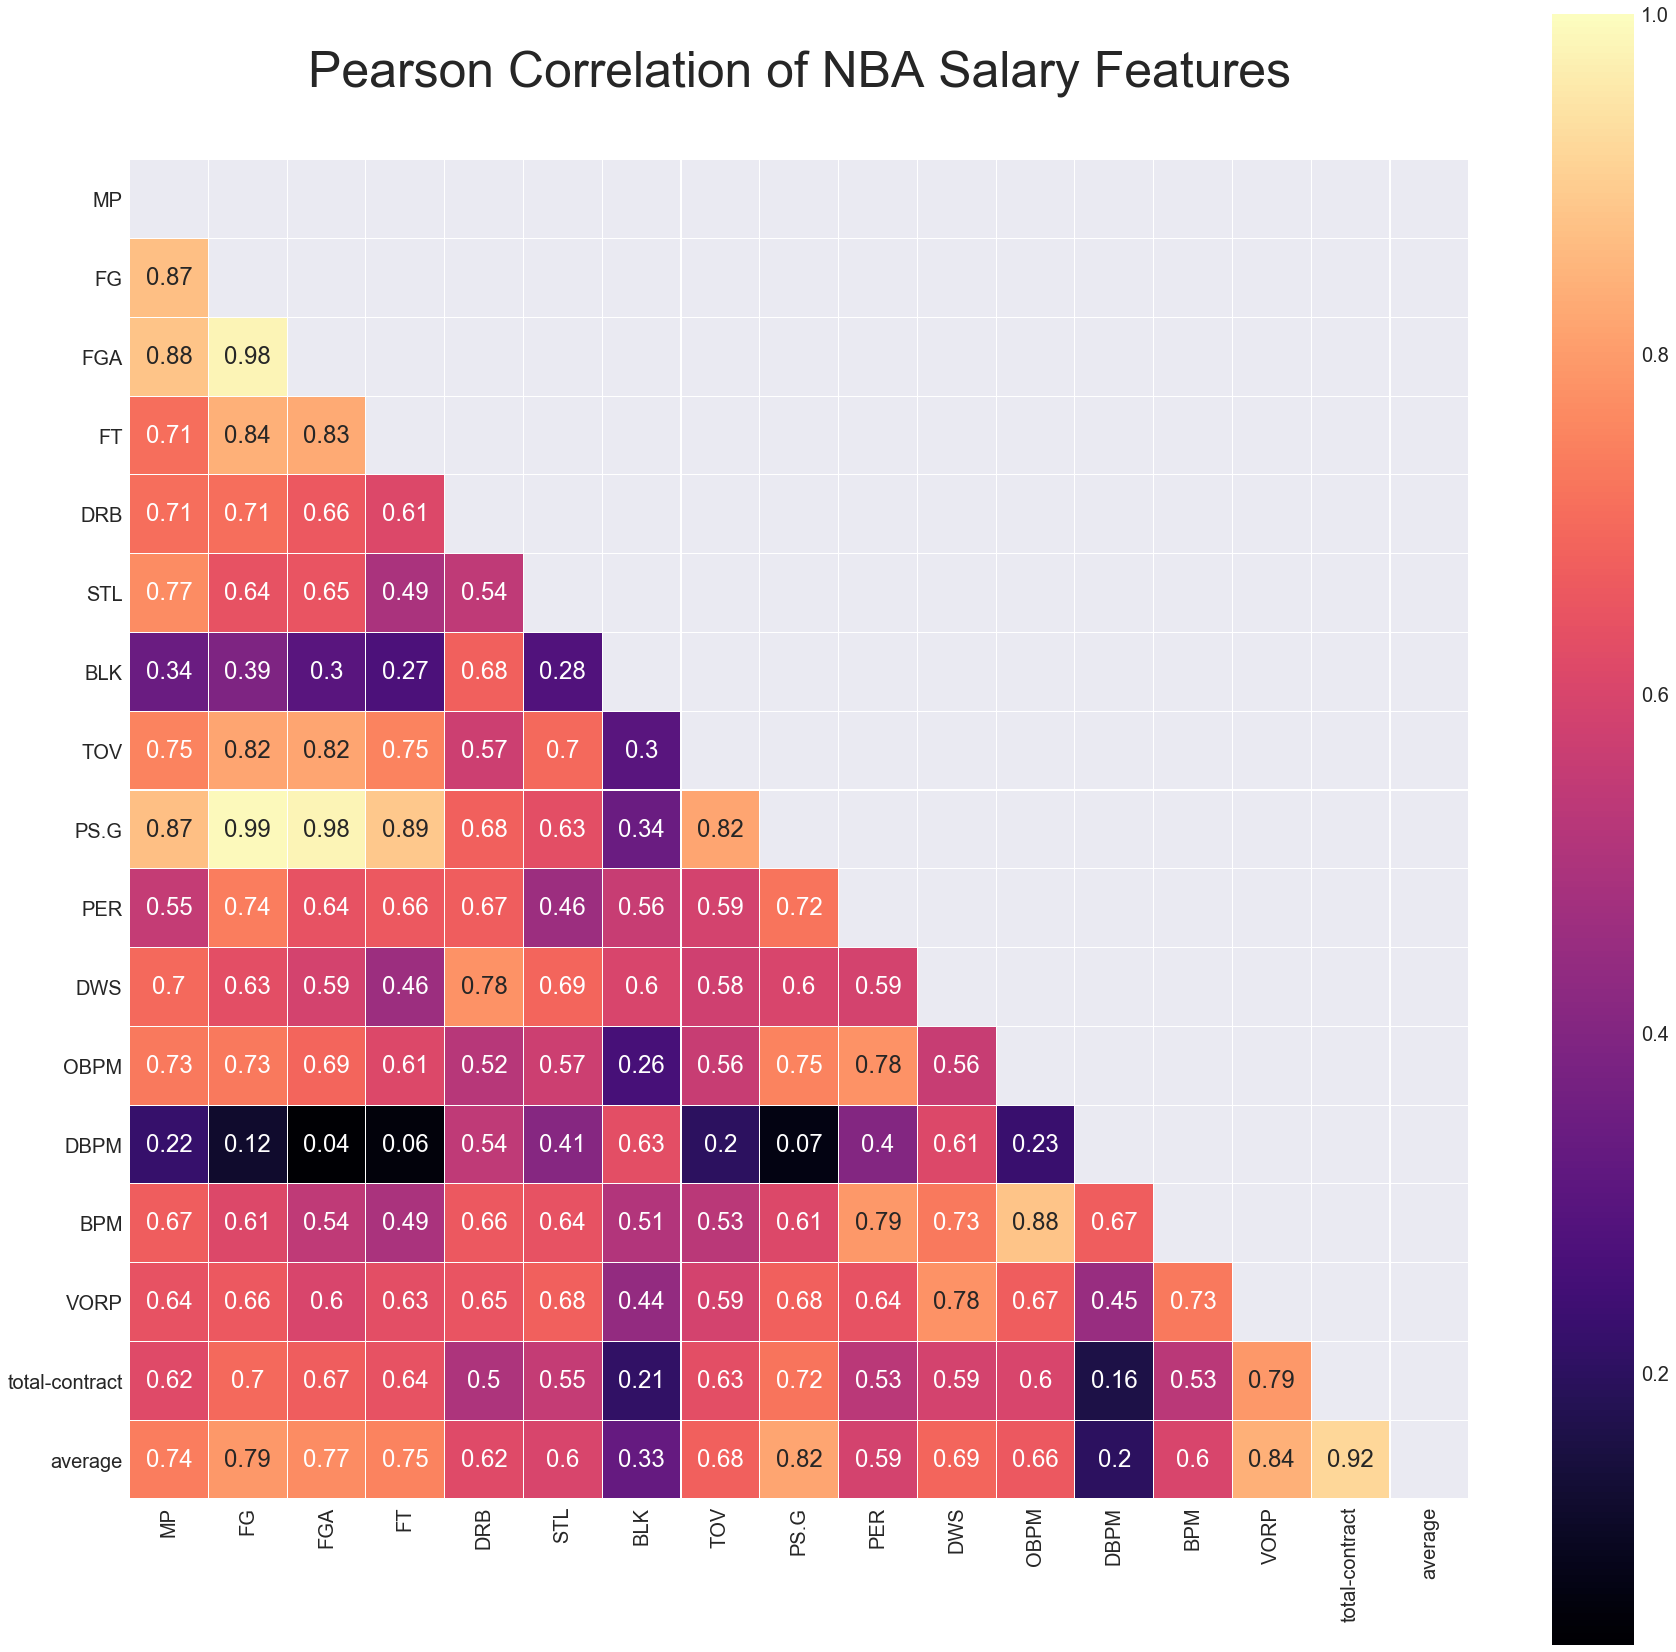

In [37]:
# Check correlation between features 
sns.set(font_scale=2)
colormap = plt.cm.magma
plt.figure(figsize=(30,30))

plt.title('Pearson Correlation of NBA Salary Features', y=1.05, size=50)

corr = final2.astype(float).corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)

# mask upper diagonal of heatmap
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,\
            mask = mask, linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [38]:
#Selecting candidates
final2.drop(final2.columns[[0, 1, 2, 3, 5, 6, 9, 10, 11, 12, 13, 15 ]], axis = 1, inplace = True)
final2.columns

Index(['DRB', 'TOV', 'PS.G', 'VORP', 'average'], dtype='object')

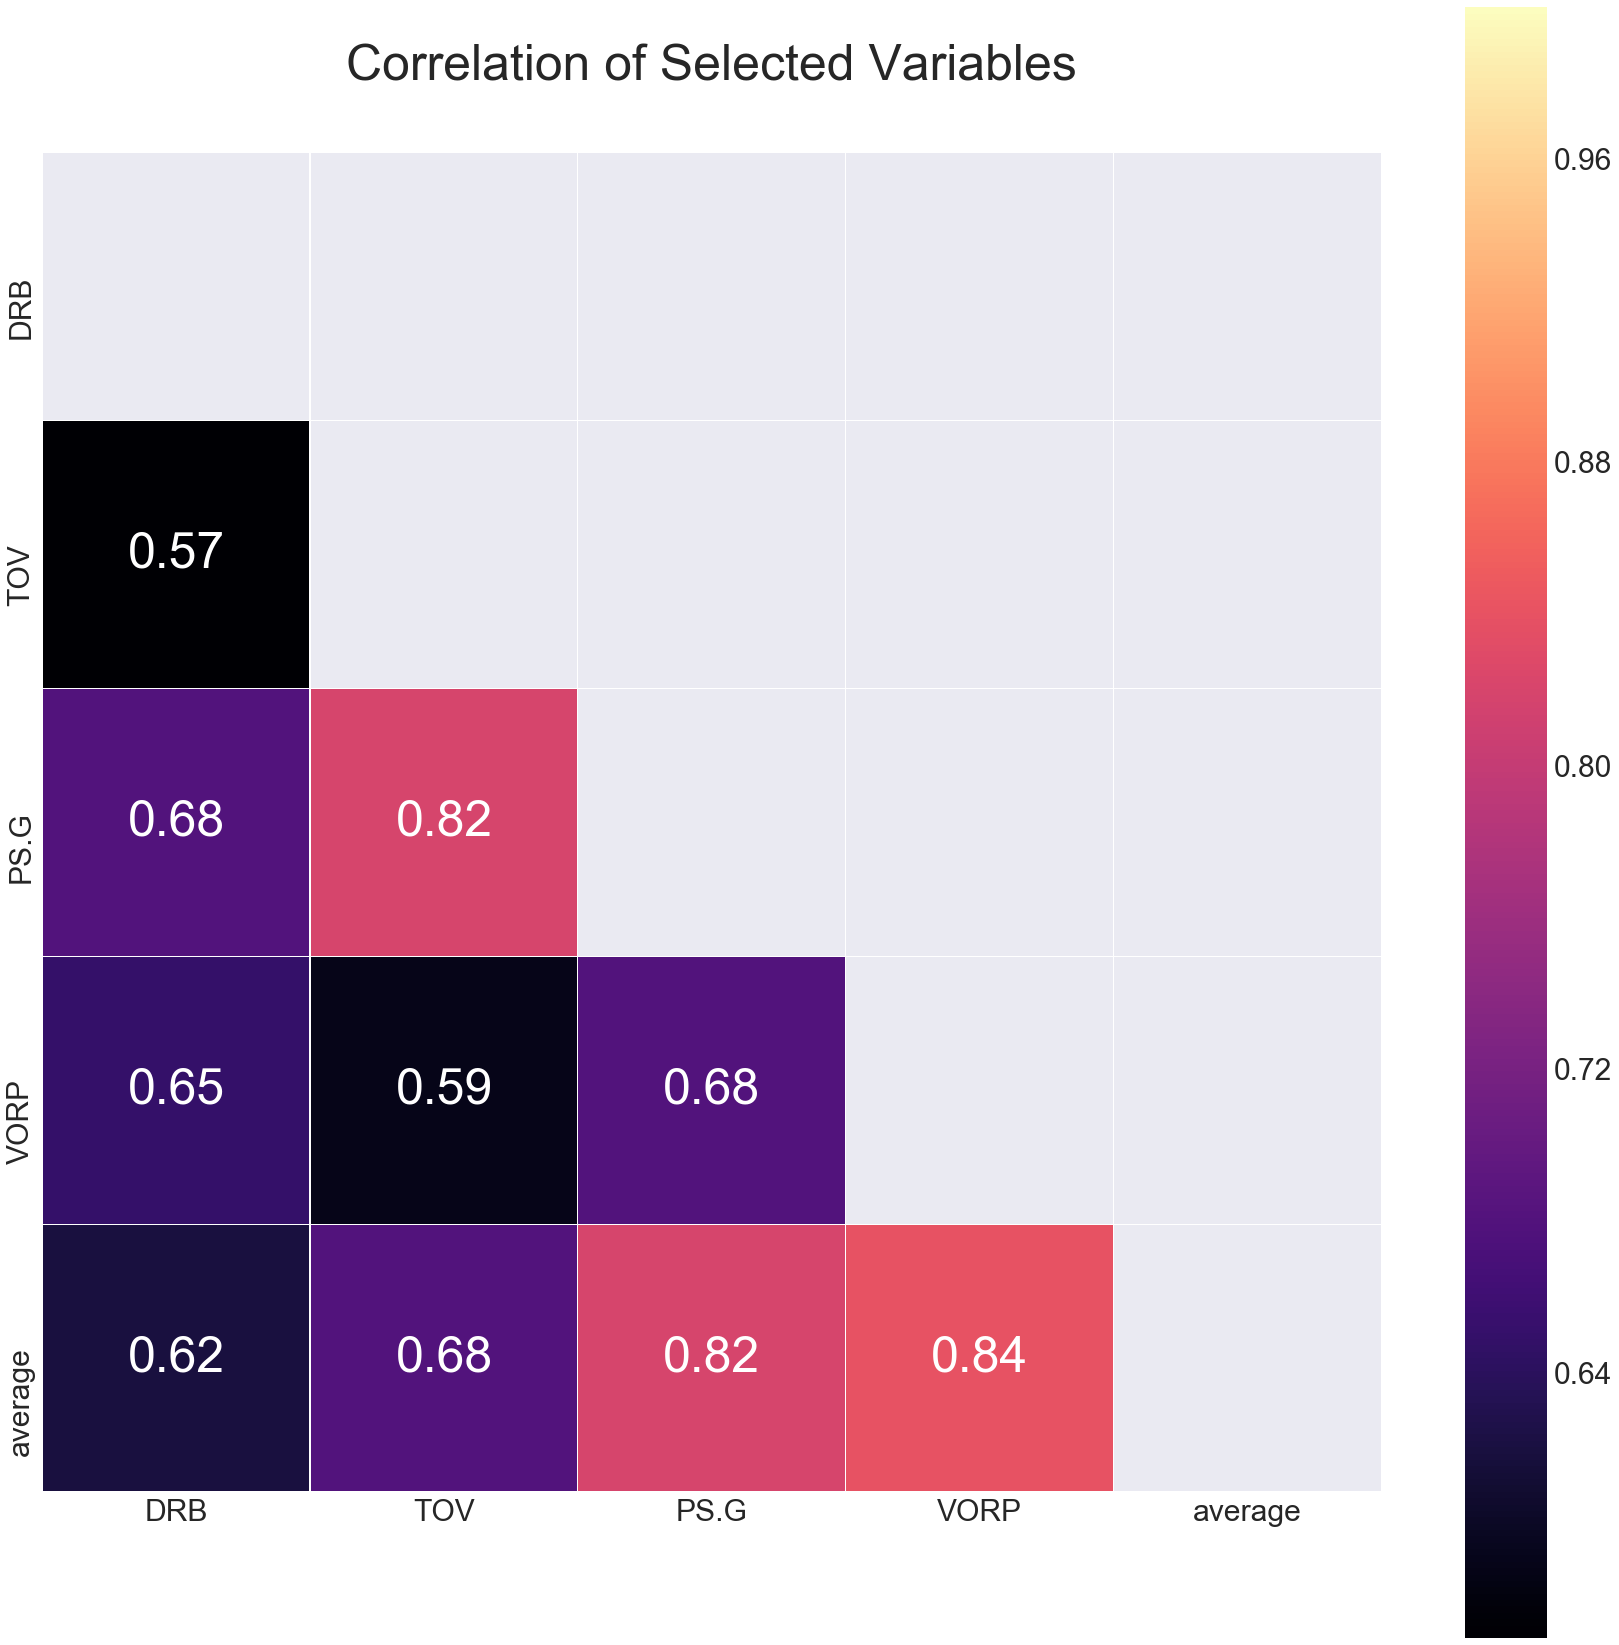

In [39]:
# Check correlation between features 
sns.set(font_scale=3)
colormap = plt.cm.magma
plt.figure(figsize=(30,30))

plt.title('Correlation of Selected Variables', y=1.05, size=50)

corr = final2.astype(float).corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)

# mask upper diagonal of heatmap
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,\
            mask = mask, linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True,
           annot_kws={"size": 50})